## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Read Data

In [2]:
data = pd.read_csv(r"restaurant_menu_optimization_data.csv")
data

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium
...,...,...,...,...,...,...
995,R003,Beverages,Soda,['confidential'],2.16,Low
996,R001,Appetizers,Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.86,Medium
997,R003,Main Course,Vegetable Stir-Fry,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",20.57,High
998,R002,Desserts,Tiramisu,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.80,High


## Analysis & Visualization

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [4]:
data.describe(include="O")

,RestaurantID,MenuCategory,MenuItem,Ingredients,Profitability
count,1000,1000,1000,1000,1000
unique,3,4,16,4,3
top,R001,Beverages,Iced Tea,['confidential'],Medium
freq,354,264,72,264,495


In [5]:
for col in data.columns:
    if data[col].dtype == object:
        print(f"Column Name   : {col}")
        temp = data[col].unique()
        print(f"Unique Values : {len(temp)}")
        print(f"Categories    : ")
        for category in temp:
            print(f"\t\t{category}")
        print(70 * '-')
            

Column Name   : RestaurantID
Unique Values : 3
Categories    : 
		R003
		R001
		R002
----------------------------------------------------------------------
Column Name   : MenuCategory
Unique Values : 4
Categories    : 
		Beverages
		Appetizers
		Desserts
		Main Course
----------------------------------------------------------------------
Column Name   : MenuItem
Unique Values : 16
Categories    : 
		Soda
		Spinach Artichoke Dip
		New York Cheesecake
		Chicken Alfredo
		Grilled Steak
		Stuffed Mushrooms
		Tiramisu
		Lemonade
		Chocolate Lava Cake
		Iced Tea
		Coffee
		Bruschetta
		Vegetable Stir-Fry
		Shrimp Scampi
		Fruit Tart
		Caprese Salad
----------------------------------------------------------------------
Column Name   : Ingredients
Unique Values : 4
Categories    : 
		['confidential']
		['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']
		['Chocolate', 'Butter', 'Sugar', 'Eggs']
		['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Parmesan']
------------------------------------------------

In [6]:
data.groupby(["Profitability"])["Price"].mean()

Profitability
High      18.660855
Low        6.321092
Medium     9.823657
Name: Price, dtype: float64

In [7]:
# I want to check the MenuCategory mean price
data.groupby(["MenuCategory"])["Price"].mean()

MenuCategory
Appetizers     11.420866
Beverages       3.505530
Desserts       14.972148
Main Course    22.826460
Name: Price, dtype: float64

In [8]:
# I want to check the MenuItem mean price depending on MenuCategory
data.groupby(["Profitability", "MenuCategory", "MenuItem"])["Price"].mean()

Profitability  MenuCategory  MenuItem             
High           Appetizers    Bruschetta               13.010000
                             Caprese Salad            13.739677
                             Spinach Artichoke Dip    13.084783
                             Stuffed Mushrooms        13.444400
               Beverages     Coffee                    3.784000
                             Iced Tea                  2.040000
                             Lemonade                  2.927500
                             Soda                      2.810000
               Desserts      Chocolate Lava Cake      17.335000
                             Fruit Tart               17.680000
                             New York Cheesecake      17.052258
                             Tiramisu                 17.188065
               Main Course   Chicken Alfredo          25.216667
                             Grilled Steak            25.462286
                             Shrimp Scampi           

<Axes: ylabel='Price'>

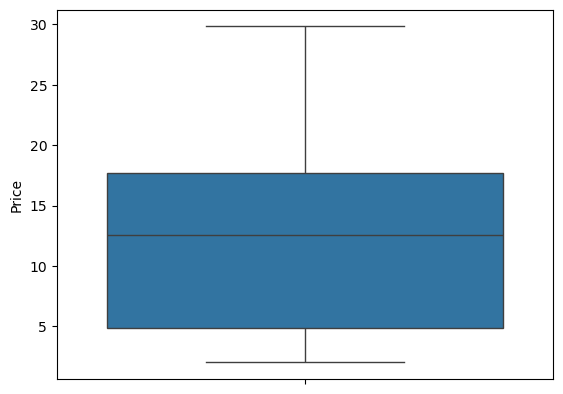

In [9]:
sns.boxplot(data["Price"])

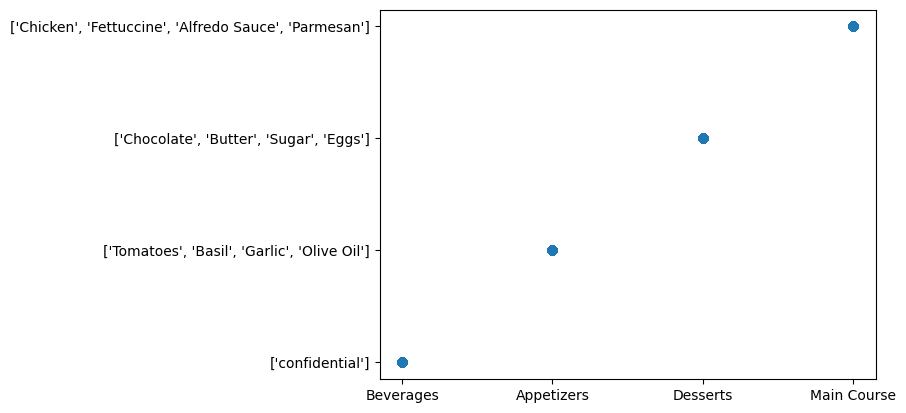

In [10]:
# These two columns are very correclated, We will drop one of them
plt.scatter(x=data["MenuCategory"], y=data["Ingredients"])

In [11]:
data.drop(["Ingredients", "MenuItem", "RestaurantID"], axis=1, inplace=True) # "RestaurantID", "MenuCategory", "MenuItem"

In [12]:
data

,MenuCategory,Price,Profitability
0,Beverages,2.55,Low
1,Appetizers,11.12,Medium
2,Desserts,18.66,High
3,Main Course,29.55,High
4,Main Course,17.73,Medium
...,...,...,...
995,Beverages,2.16,Low
996,Appetizers,11.86,Medium
997,Main Course,20.57,High
998,Desserts,18.80,High


In [13]:
# count_df = data.groupby(['RestaurantID', 'Profitability']).size().unstack(fill_value=0)

# ordered_columns = ['Low', 'Medium', 'High']
# count_df = count_df[ordered_columns]

# count_df.plot(kind='bar') # , stacked=True

# plt.title('Profitability Counts by RestaurantID')
# plt.xlabel('RestaurantID')
# plt.ylabel('Count')
# plt.legend(title='Profitability')
# plt.show()

In [14]:
data["Profitability"].replace({"Low": 0, "Medium": 1, "High": 2}, inplace=True)

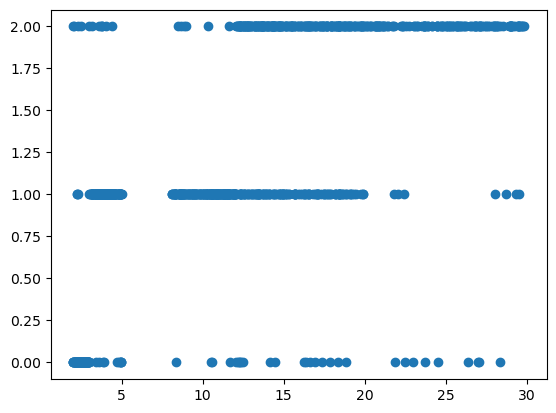

In [15]:
plt.scatter(data["Price"], data["Profitability"])

In [16]:
# data = pd.get_dummies(data, columns=["MenuItem"])
# data = pd.get_dummies(data, columns=["RestaurantID"])

data = pd.get_dummies(data, columns=["MenuCategory"])

# data["MenuCategory"].replace({"Beverages":0, "Appetizers":1, "Desserts":2, "Main Course": 3}, inplace=True)
# data.replace({False: 0, True: 1}, inplace=True)

data

,Price,Profitability,MenuCategory_Appetizers,MenuCategory_Beverages,MenuCategory_Desserts,MenuCategory_Main Course
0,2.55,0,False,True,False,False
1,11.12,1,True,False,False,False
2,18.66,2,False,False,True,False
3,29.55,2,False,False,False,True
4,17.73,1,False,False,False,True
...,...,...,...,...,...,...
995,2.16,0,False,True,False,False
996,11.86,1,True,False,False,False
997,20.57,2,False,False,False,True
998,18.80,2,False,False,True,False


In [17]:
y = data["Profitability"]
X = data.drop(["Profitability"], axis=1)

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

## Modeling 

### Decision Tree

In [20]:
decisionTree_model = DecisionTreeClassifier()
decisionTree_model.fit(X_train, y_train)

decisionTree_y_pred = decisionTree_model.predict(X_test)

for index, (real_value, predicted_value) in zip(range(10), zip(y_test, decisionTree_y_pred)):    
    print(f"Real value is {str(round(real_value)).rjust(5)} | The predicted value is {str(round(predicted_value)).rjust(5)}")

Real value is     0 | The predicted value is     1
Real value is     1 | The predicted value is     1
Real value is     1 | The predicted value is     1
Real value is     2 | The predicted value is     1
Real value is     1 | The predicted value is     1
Real value is     1 | The predicted value is     1
Real value is     0 | The predicted value is     0
Real value is     2 | The predicted value is     2
Real value is     1 | The predicted value is     1
Real value is     1 | The predicted value is     1


In [21]:
confusion_matrix(y_test, decisionTree_y_pred)

array([[ 16,   9,   5],
       [  4, 114,   6],
       [  5,  11,  80]], dtype=int64)

In [22]:
accuracy_score(y_test, decisionTree_y_pred)

0.84

### Random Forest

In [23]:
randomForest_model = RandomForestClassifier(n_estimators=200, random_state=42)
randomForest_model.fit(X_train, y_train)

randomForest_y_pred = randomForest_model.predict(X_test)

for index, (real_value, predicted_value) in zip(range(1, 10), zip(y_test, randomForest_y_pred)):        
    print(f"Real value is {str(round(real_value)).rjust(5)} | The predicted value is {str(round(predicted_value)).rjust(5)}")

Real value is     0 | The predicted value is     1
Real value is     1 | The predicted value is     1
Real value is     1 | The predicted value is     1
Real value is     2 | The predicted value is     1
Real value is     1 | The predicted value is     1
Real value is     1 | The predicted value is     1
Real value is     0 | The predicted value is     0
Real value is     2 | The predicted value is     2
Real value is     1 | The predicted value is     1


In [24]:
confusion_matrix(y_test, randomForest_y_pred)

array([[ 16,   9,   5],
       [  3, 115,   6],
       [  4,  11,  81]], dtype=int64)

In [25]:
accuracy_score(y_test, randomForest_y_pred)

0.848

### KNeighbors 

In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_classifier.predict(X_test)

for index, (real_value, predicted_value) in zip(range(1, 10), zip(y_test, knn_y_pred)):        
    print(f"Real value is {str(round(real_value)).rjust(5)} | The predicted value is {str(round(predicted_value)).rjust(5)}")

Real value is     0 | The predicted value is     1
Real value is     1 | The predicted value is     1
Real value is     1 | The predicted value is     1
Real value is     2 | The predicted value is     2
Real value is     1 | The predicted value is     1
Real value is     1 | The predicted value is     1
Real value is     0 | The predicted value is     0
Real value is     2 | The predicted value is     2
Real value is     1 | The predicted value is     1


In [27]:
confusion_matrix(y_test, knn_y_pred)

array([[ 16,   8,   6],
       [  0, 120,   4],
       [  2,   5,  89]], dtype=int64)

In [28]:
accuracy_score(y_test, knn_y_pred)

0.9